<a href="https://colab.research.google.com/github/jupena01/Homeworks/blob/main/HW_2_Julian_Pena_661979108_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target_names
iris.target
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.40, train_size=0.60, random_state=123, shuffle=True, stratify=y)
clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print('predictions: ')
print(preds)
print('actual iris species:')
print(y_test)
acc = accuracy_score(y_test,clf.predict(X_test))
print('accuracy score :', acc)

predictions: 
[1 1 1 1 0 2 2 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species:
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9666666666666667


accuracy score: 0.9955156950672646
no we cannot use pairplot to visualize the data!
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        85
           6       0.99      0.99      0.99        95
           8       0.99      0.99      0.99        91

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446

6s that were classificed correctly :  94


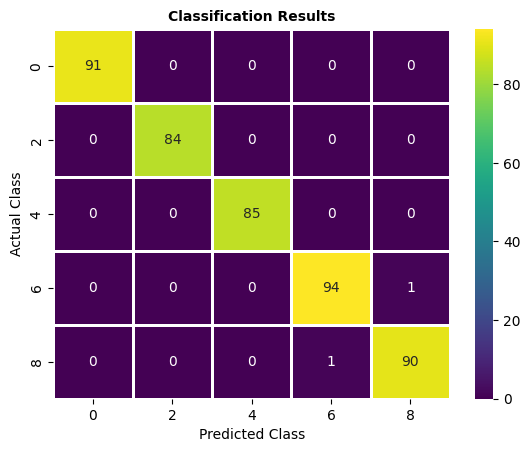

In [ ]:
#Question 2
import numpy as np
from sklearn import datasets
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

digits = datasets.load_digits()

class My_KNNClassifier:
  def __init__(self, k=3):
    self.k = k
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  def predict(self, X_test):
    predictions = []
    for i in range(X_test.shape[0]):
      predictions.append(self._knn_classifier(X_test[i]))
    return predictions
  def _knn_classifier(self, X_test):
    distances, targets = [], []
    for i in range(self.X_train.shape[0]):
      distance = np.linalg.norm(self.X_train[i]-X_test)
      distances.append([distance, i])
    distances = sorted(distances)
    for i in range(self.k):
      index = distances[i][1]
      targets.append(self.y_train[index])
    return max(targets, key=targets.count)

even_digits = [0, 2, 4, 6, 8]
even_digit_indices = [i for i, digit in enumerate(digits.target) if digit in even_digits]
X_even = digits.data[even_digit_indices]
y_even = digits.target[even_digit_indices]

X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.5, random_state=0)

model = My_KNNClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print('accuracy score:',accuracy_score(y_test, preds))

print('no we cannot use pairplot to visualize the data!')

cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True)

ax.set_xticklabels(even_digits)
ax.set_yticklabels(even_digits)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Classification Results', fontsize='medium', fontweight='bold')
print(classification_report(y_test, model.predict(X_test)))

index_of_6 = even_digits.index(6)
correctly_classified_6s = cm[index_of_6, index_of_6]
print('6s that were classificed correctly : ', correctly_classified_6s)

predicted_labels: [1 2 1 2 2 0 0 1 0 0 2 0 2 0 1 0 1 1 0 0 0 0 0 1 0 1 2 0 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 2 1]
cluster centroids: [[5.04285714 3.43428571 1.48857143]
 [5.82619048 2.72142857 4.35238095]
 [6.77857143 3.02857143 5.62142857]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


As I increase the numbers of clusters, the distortion of inertia decreases in a logarithmic manner, while the silhoutte score decreases in a staggered fashion.


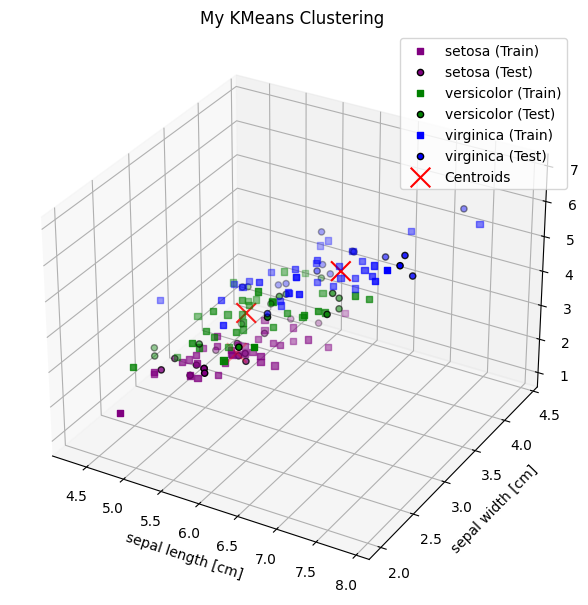

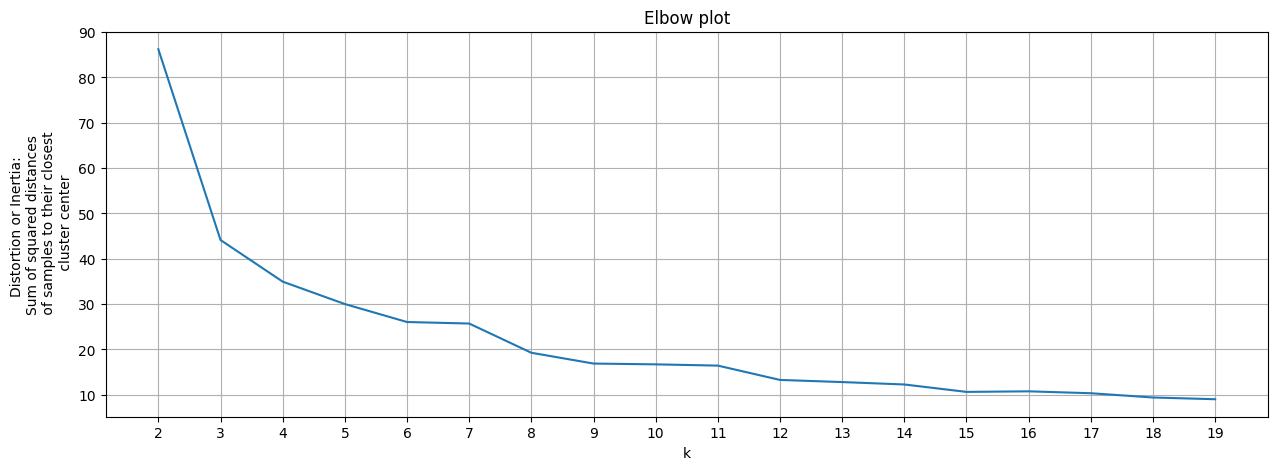

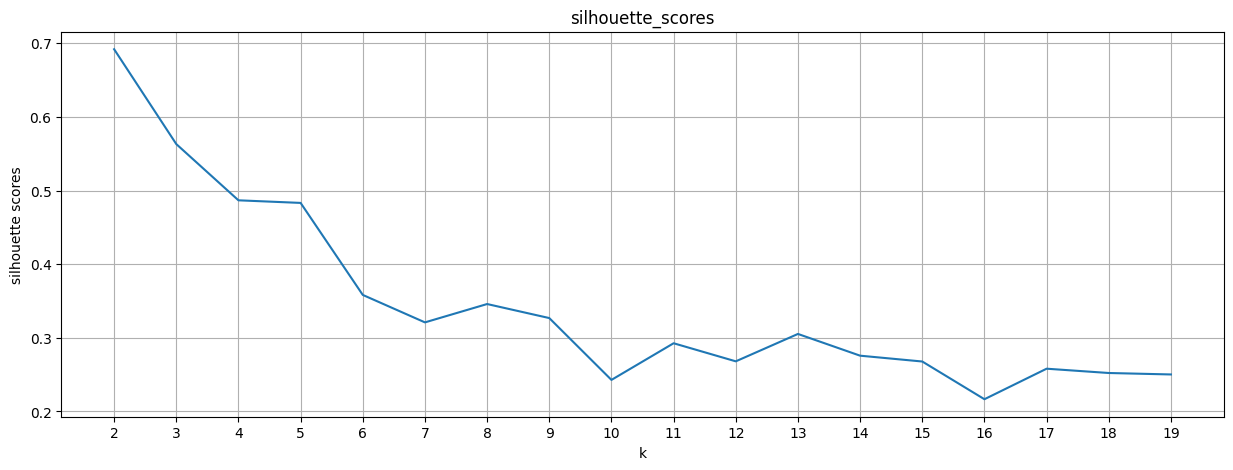

In [ ]:
#Question 3
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics import silhouette_score

data = load_iris()
X = iris.data[:, :3]
y = iris.target

species_colors = {'setosa': 'purple', 'versicolor': 'green', 'virginica': 'blue'}

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(X,y, range(X.shape[0]), test_size=0.30, train_size=0.70, random_state=123, shuffle=True, stratify=y)

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids
    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

model = KMeans(k=3)
model.fit(X_train)
kmeans_test = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_test)
print('cluster centroids:', cluster_coords)

sklearn_model = SklearnKMeans(n_clusters=3, random_state=123)
sklearn_train = sklearn_model.fit(X_train)
sklearn_test = sklearn_model.predict(X_test)

fig = plt.figure(figsize=(16, 12))

ax = fig.add_subplot(121, projection='3d')
for i, species in enumerate(iris.target_names):
    color = species_colors[species]
    ax.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], X_train[y_train == i, 2], color = color, marker='s', label= f'{species} (Train)')
    ax.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], X_test[y_test == i, 2], color = color, marker = 'o', label= f'{species} (Test)', edgecolor='k')

ax.scatter(model.centroids[:, 0], model.centroids[:, 1], model.centroids[:, 2], c='red', marker='x', s=200, label='Centroids')
ax.set_title('My KMeans Clustering')
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
ax.legend()

from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, init='k-means++', n_init='auto')
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++', n_init='auto')
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), silhouette_scores)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('silhouette_scores')
plt.xlabel('k')
plt.ylabel('silhouette scores')

print('As I increase the numbers of clusters, the distortion of inertia decreases in a logarithmic manner, while the silhoutte score decreases in a staggered fashion.')